In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.random.seed(0)

import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



# Simple CNN for Edgelovers

## a) Generation of data

In [65]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n, 2), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.random.random((xlen, ylen, 1)) * 128
        
        v_or_h = np.random.randint(0, 2)
        lines = 10
        
        if v_or_h: # horizontal
            label = [1.0, 0.0]
            for _ in range(lines):
                y = np.random.randint(2, ylen - 2)
                x1 = np.random.randint(2, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255.0
        else:  # vertical
            label = [0.0, 1.0]
            for _ in range(lines):
                x = np.random.randint(2, xlen - 2)
                y1 = np.random.randint(2, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255.0
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [66]:
x0, y0 = generate_data(50, 50, 1000)
x2, y2 = generate_data(50, 50, 1000);

Label: [1 0]


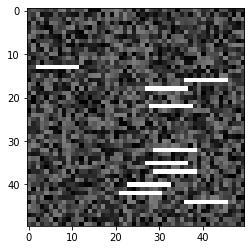

In [67]:
img = x0[0, :, :, 0]
plt.imshow(img, cmap='gray')
print("Label: {}".format(y0[0]))

## b) Build the simplest possible CNN

In [68]:
n_kernel = 1
n_epochs = 250
batch_size = 16
lr = 0.1

model = Sequential()
model.add(Conv2D(n_kernel, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=23, strides=23))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 23, 23, 1)         26        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 1000 samples, validate on 1000 samples
Epoch 1/250
1000/1000 [==============================] - 1s 950us/sample - loss: 1.4263 - accuracy: 0.5220 - val_loss: 0.7187 - val_accuracy: 0.5790
Epoch 2/250
1000/1000 [==============================] - 0s 290us/sample - loss: 0.6822 - accuracy: 0.6195 - val_loss: 0.6932 - val_accuracy: 0.5885
Epoch 3/250
1000/1000 [==============================] - 0s 289us/sample - loss: 0.6705 - accuracy: 0.6230 - val_loss: 0.6843 - val_accuracy: 0.5940
Epoch 4/250
1000/1000 [==============================] - 0s 288us/sample - loss: 0.6624 - accuracy: 0.6305 - val_loss: 0.6747 - val_accuracy: 0.6040
Epoch 5/250
1000/1000 [==============================] - 0s 280us/sample - loss: 0.6514 - accuracy: 0.6395 - val_loss: 0.6629 - val_accuracy: 0.6170
Epoch 6/250
1000/1000 [==============================] - 0s 303us/sample - loss: 0.6368 - accuracy: 0.6665 - val_loss: 0.6486 - val_accuracy: 0.6295
Epoch 7/250
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 306us/sample - loss: 0.0613 - accuracy: 0.9980 - val_loss: 0.0674 - val_accuracy: 0.9950
Epoch 56/250
1000/1000 [==============================] - 0s 311us/sample - loss: 0.0596 - accuracy: 0.9980 - val_loss: 0.0659 - val_accuracy: 0.9950
Epoch 57/250
1000/1000 [==============================] - 0s 304us/sample - loss: 0.0581 - accuracy: 0.9980 - val_loss: 0.0645 - val_accuracy: 0.9950
Epoch 58/250
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0566 - accuracy: 0.9980 - val_loss: 0.0631 - val_accuracy: 0.9950
Epoch 59/250
1000/1000 [==============================] - 0s 295us/sample - loss: 0.0551 - accuracy: 0.9980 - val_loss: 0.0619 - val_accuracy: 0.9950
Epoch 60/250
1000/1000 [==============================] - 0s 295us/sample - loss: 0.0538 - accuracy: 0.9980 - val_loss: 0.0605 - val_accuracy: 0.9950
Epoch 61/250
1000/1000 [==============================] - 0s 290us/sample - loss: 0.0524 - accuracy: 0.9980 - val

1000/1000 [==============================] - 0s 292us/sample - loss: 0.0209 - accuracy: 0.9980 - val_loss: 0.0254 - val_accuracy: 0.9950
Epoch 110/250
1000/1000 [==============================] - 0s 321us/sample - loss: 0.0206 - accuracy: 0.9980 - val_loss: 0.0239 - val_accuracy: 0.9960
Epoch 111/250
1000/1000 [==============================] - 0s 314us/sample - loss: 0.0205 - accuracy: 0.9980 - val_loss: 0.0237 - val_accuracy: 0.9950
Epoch 112/250
1000/1000 [==============================] - 0s 310us/sample - loss: 0.0202 - accuracy: 0.9980 - val_loss: 0.0248 - val_accuracy: 0.9950
Epoch 113/250
1000/1000 [==============================] - 0s 306us/sample - loss: 0.0199 - accuracy: 0.9980 - val_loss: 0.0235 - val_accuracy: 0.9950
Epoch 114/250
1000/1000 [==============================] - 0s 305us/sample - loss: 0.0198 - accuracy: 0.9980 - val_loss: 0.0224 - val_accuracy: 0.9970
Epoch 115/250
1000/1000 [==============================] - 0s 303us/sample - loss: 0.0195 - accuracy: 0.9980

1000/1000 [==============================] - 0s 301us/sample - loss: 0.0148 - accuracy: 0.9980 - val_loss: 0.0159 - val_accuracy: 0.9980
Epoch 164/250
1000/1000 [==============================] - 0s 290us/sample - loss: 0.0147 - accuracy: 0.9980 - val_loss: 0.0225 - val_accuracy: 0.9950
Epoch 165/250
1000/1000 [==============================] - 0s 289us/sample - loss: 0.0148 - accuracy: 0.9980 - val_loss: 0.0202 - val_accuracy: 0.9950
Epoch 166/250
1000/1000 [==============================] - 0s 304us/sample - loss: 0.0145 - accuracy: 0.9980 - val_loss: 0.0191 - val_accuracy: 0.9950
Epoch 167/250
1000/1000 [==============================] - 0s 306us/sample - loss: 0.0145 - accuracy: 0.9980 - val_loss: 0.0155 - val_accuracy: 0.9980
Epoch 168/250
1000/1000 [==============================] - 0s 307us/sample - loss: 0.0145 - accuracy: 0.9980 - val_loss: 0.0189 - val_accuracy: 0.9950
Epoch 169/250
1000/1000 [==============================] - 0s 312us/sample - loss: 0.0146 - accuracy: 0.9980

1000/1000 [==============================] - 0s 283us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0154 - val_accuracy: 0.9970
Epoch 218/250
1000/1000 [==============================] - 0s 280us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0158 - val_accuracy: 0.9970
Epoch 219/250
1000/1000 [==============================] - 0s 284us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0149 - val_accuracy: 0.9970
Epoch 220/250
1000/1000 [==============================] - 0s 279us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0163 - val_accuracy: 0.9970
Epoch 221/250
1000/1000 [==============================] - 0s 281us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0176 - val_accuracy: 0.9970
Epoch 222/250
1000/1000 [==============================] - 0s 284us/sample - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.0167 - val_accuracy: 0.9970
Epoch 223/250
1000/1000 [==============================] - 0s 279us/sample - loss: 0.0137 - accuracy: 0.9980

In [70]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.013473922338336707
Accuracy train set: 0.9980000257492065

Loss validation set: 0.01545273719727993
Accuracy validation set: 0.996999979019165



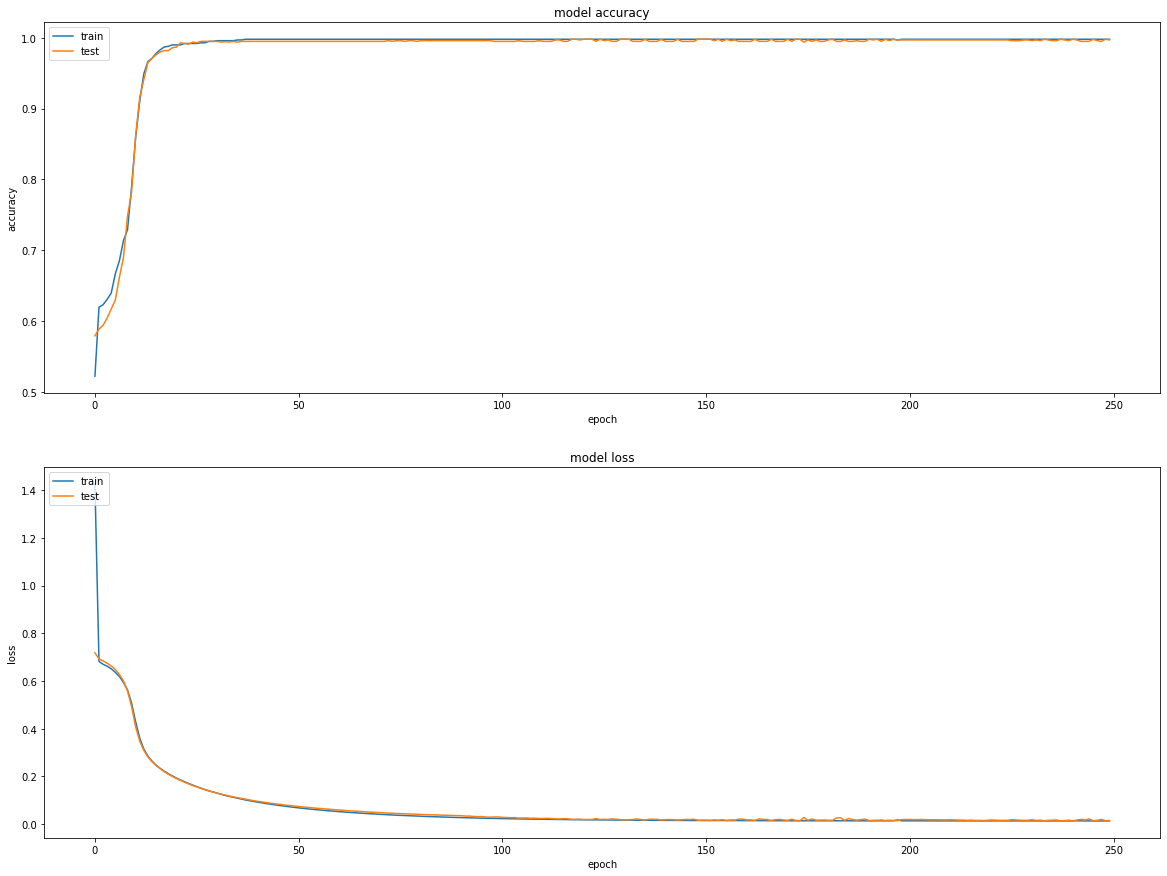

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

## c) Visualize the learned kernel

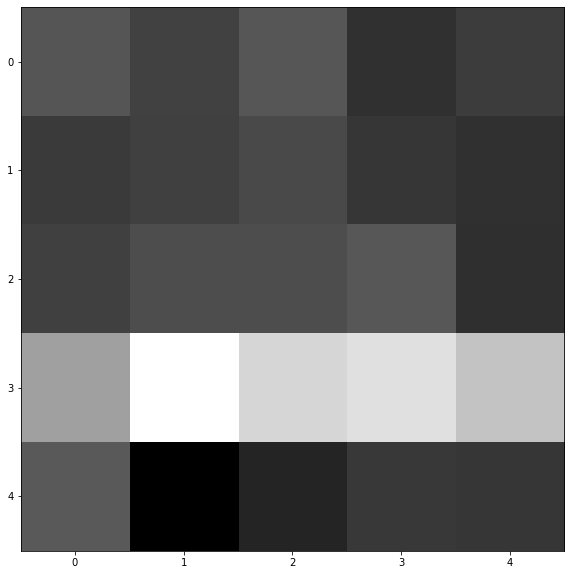

In [72]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
f = filters[:, :, 0, 0]
axes.imshow(f, cmap='gray');

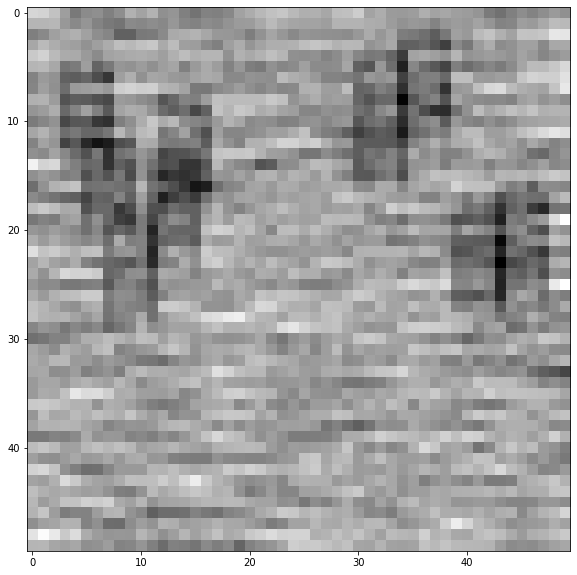

In [73]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 1
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
f = filters[:, :, 0, 0]
index = np.where(y0 == [0.0, 1.0])[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
axes.imshow(grad, cmap='gray')

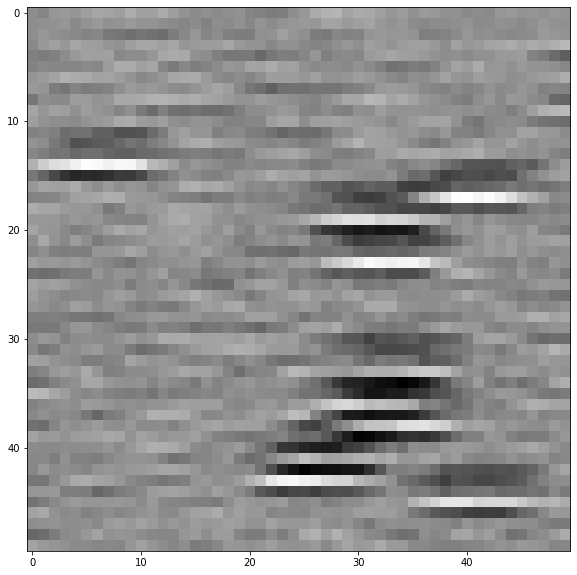

In [74]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 1
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
f = filters[:, :, 0, 0]
index = np.where(y0 == [1.0, 0.0])[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
axes.imshow(grad, cmap='gray')